In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [2]:
wine_data = load_wine()
X = wine_data.data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


In [9]:
def evaluate_clustering(X, labels, method_name):
  if len(set(labels)) > 1:
    silhouette = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    print(f"Clustering_method - {method_name}")
    print(f"Silhouette Score: {silhouette}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz}")
    print(f"Davis_Bouldin Score: {davies_bouldin}")
  else :
    print("clustering not possible\n")


In [10]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(x_scaled)
evaluate_clustering(x_scaled, kmeans_labels, "KMeans")

Clustering_method - KMeans
Silhouette Score: 0.2848589191898987
Calinski-Harabasz Score: 70.9400080031512
Davis_Bouldin Score: 1.3891879777181646


In [13]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_scaled)
evaluate_clustering(x_scaled, dbscan_labels, "DBSCAN")

clustering not possible



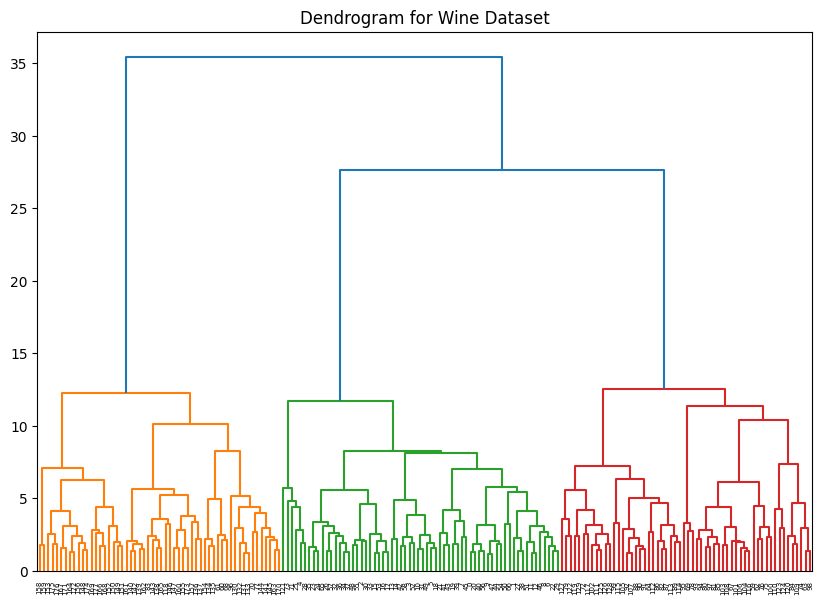

In [15]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Wine Dataset")
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method='ward'))
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(x_scaled)
evaluate_clustering(x_scaled, hierarchical_labels, "Hierarchical Clustering")

Clustering_method - Hierarchical Clustering
Silhouette Score: 0.2774439826952266
Calinski-Harabasz Score: 67.6474675044098
Davis_Bouldin Score: 1.4185919431857326
